# 선형회귀분석 


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀모델 생성
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm # ols 모델
from sklearn.metrics import mean_squared_error # MSE 평균제곱오차 -model 평가
from sklearn import datasets # sklearn 기본데이터셋
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df = pd.read_csv("datasets/kc_house_data.csv")

# 데이터 샘플 확인
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

| 열 이름       | 설명                                   |
|--------------|----------------------------------------|
| id           | 주택 거래에 대한 고유 식별자          |
| date         | 주택 거래가 발생한 날짜               |
| price        | 주택의 가격                            |
| bedrooms     | 침실의 수                               |
| bathrooms    | 욕실의 수                               |
| sqft_living  | 주택의 실내 주거 공간 면적 (제곱 피트) |
| sqft_lot     | 부지의 전체 크기 (제곱 피트)           |
| floors       | 주택의 층 수                           |
| waterfront   | 해변이나 호수와 인접한 경우 1, 그렇지 않으면 0인 이진 값 |
| view         | 주택의 전망 등급                      |
| condition    | 주택의 상태 등급                      |
| grade        | 주택의 등급                            |
| sqft_above   | 지하실을 제외한 지상 층의 주거 공간 면적 (제곱 피트) |
| sqft_basement| 지하실의 주거 공간 면적 (제곱 피트)      |
| yr_built     | 주택 건설 연도                         |
| yr_renovated | 주택 리모델링 또는 개조 연도          |
| zipcode      | 주택이 위치한 우편번호                  |
| lat          | 주택의 위도 좌표                       |
| long         | 주택의 경도 좌표                       |
| sqft_living15| 2015년 현재 주거 공간의 평균 크기 (제곱 피트) |
| sqft_lot15   | 2015년 현재 부지의 평균 크기 (제곱 피트) |


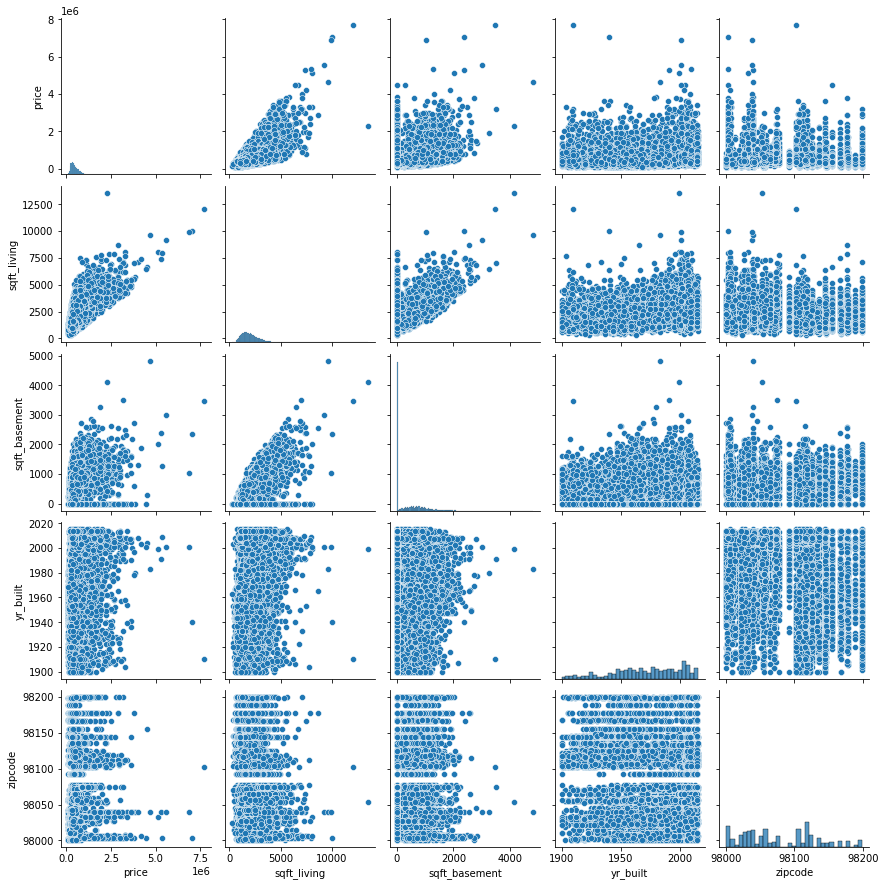

In [6]:
sns.pairplot(df[['price','sqft_living','sqft_basement','yr_built','zipcode']])
plt.show()
plt.close()

price와 sqft_living , price와 sqft_basement , yr_built 까지 영향을 줄 것 같음

sqft_living과 sqft_basement는 높은 상관관계 보임 -> 다중공선성 유발

In [21]:
# 컬럼명 불러와서 키 값, 종속변수 제외
컬럼 = list(df.columns)
컬럼.remove('id')
컬럼.remove('date')
컬럼.remove('price')
컬럼

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [25]:
# 랜덤 시드 고정
np.random.seed(777)

# 독립변수와 종속변수 분리
x = df[컬럼]
y = df['price']

# 훈련/검증셋 7:3 분리
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=777)

# 분리 확인
print('train data 개수',len(x_train))
print('test data 개수',len(x_test))


train data 개수 15129
test data 개수 6484


### 다중회귀모델 생성

In [26]:
model = LinearRegression() # Intercept을 빼고 싶으면 파라미터 fit_intercept=False
model.fit(x_train,y_train)

# 사이킷런의 LinearRegression를 학습 데이터에 적용한다. 
# train을 통해 price를 예측할 수 있는 회귀계수가 생성된다.


LinearRegression()

In [27]:
# 테스트셋에 모델 적용
y_predict = model.predict(x_test)

# 학습셋으로 생성된 모델을 테스트셋에 적용하여 예측값 생성. 이걸로 모델 성능을 측정한다. 

In [33]:
# 생성한 회귀모델의 상수값과 회귀계수 확인 

# 모델의 Intercept 확인
print('상수값:',model.intercept_)

# 모델의 회귀계수 확인
print('회귀계수:',model.coef_)

상수값: 8570147.894349292
회귀계수: [-3.82787896e+04  3.82687189e+04  1.11731259e+02  1.91555125e-01
  1.29655608e+04  6.08888397e+05  5.21972958e+04  2.48843124e+04
  9.67725712e+04  6.73647989e+01  4.43664603e+01 -2.70546347e+03
  1.54019226e+01 -5.68427797e+02  5.84000065e+05 -1.96831786e+05
  2.22931298e+01 -4.81735814e-01]


In [34]:
# 생성한 모델의 성능평가 
# R-Square확인

print('train R-square:{:.2f}'.format(model.score(x_train,y_train)))
print('test R-square:{:.2f}'.format(model.score(x_test,y_test)))

# 실무에서는 0.7 나오면 높은 편

train R-square:0.70
test R-square:0.69


OLS를 이용하여 모델 결과값 확인

In [38]:
# Ordinary Least Squares 
# OLS(종속변수 학습데이터,상수항추가(독립변수의 학습데이터))
# statsmodels의 약자를 sm이라고 설정했음 

model_ols = sm.OLS(y_train,sm.add_constant(x_train)).fit() #  OLS 모델 생성 맟 OLS 모델을 학습 데이터에 적합시킴
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2092.
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:25:04   Log-Likelihood:            -2.0611e+05
No. Observations:               15129   AIC:                         4.123e+05
Df Residuals:                   15111   BIC:                         4.124e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           8.57e+06   3.48e+06      2.460      0.014    1.74e+06    1.54e+07
bedrooms      -3.828e+04   2342.621    -16.340      0.000   -4.29e+04   -3.37e+04
bathrooms      3.827e+04   3841.799      9.961      0.000    3.07e+04    4.58e+04
sqft_living     111.7336      2.694     41.474      0.000     106.453     117.014
sqft_lot          0.1916      0.057      3.336      0.001       0.079       0.304
floors         1.297e+04   4265.338      3.040      0.002    4604.983    2.13e+04
waterfront     6.089e+05   2.02e+04     30.125      0.000    5.69e+05    6.49e+05
view            5.22e+04   2563.144     20.365      0.000    4.72e+04    5.72e+04
condition      2.488e+04   2787.975      8.926      0.000    1.94e+04    3.03e+04
grade          9.677e+04   2556.760     37.850      0.000    9.18e+04    1.02e+05
sqft_above       67.3625      2.697     24.975      0.000      62.076      72.649
sqft_basement    44.3641      3.165     14.019      0.000      38.161      50.567
yr_built      -2705.4635     85.819    -31.525      0.000   -2873.680   -2537.247
yr_renovated     15.4019      4.370      3.524      0.000       6.836      23.968
zipcode        -568.4278     39.329    -14.453      0.000    -645.518    -491.338
lat             5.84e+05   1.27e+04     46.118      0.000    5.59e+05    6.09e+05
long          -1.968e+05   1.54e+04    -12.756      0.000   -2.27e+05   -1.67e+05
sqft_living15    22.2931      4.074      5.472      0.000      14.308      30.278
sqft_lot15       -0.4817      0.086     -5.602      0.000      -0.650      -0.313
==============================================================================
Omnibus:                    12720.574   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1270134.404
Skew:                           3.497   Prob(JB):                         0.00
Kurtosis:                      47.339   Cond. No.                     5.42e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.22e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

회귀분석 모델에서 가장 작은 고유값(eigenvalue)이 매우 작다 -> 다중공선성 문제 

### 다항회귀 모델 생성 및 적용

In [39]:
from sklearn.preprocessing import PolynomialFeatures # 단항 변수를 다항 변수로 변환

# 2차 다항식으로 변수 변환 
# degree = 독립변수를 2차항으로 변환
# include_bias = intercept를 생성하지 않음 / 편향을 위한 변수 1을 추가, 다항식의 모든 거듭제곱이 0일 경우 True(기본값)로 설정한다. 
# [x1, x2, x1^2, x2^2, x1*x2]

poly_m = PolynomialFeatures(degree=2,include_bias=False) 
x_train_poly = poly_m.fit_transform(x_train)

# 다중회귀모델 생성
model_poly = LinearRegression()

# 다항회귀 학습
model_poly.fit(x_train_poly,y_train)

# 테스트셋에 모델 적용
x_test_poly = poly_m.fit_transform(x_test)
y_predict_poly = model_poly.predict(x_test_poly)

In [40]:
# 다항회귀모델 상수값과 회귀계수 확인

print(model_poly.intercept_)
print(model_poly.coef_)

21442375745.257774
[ 1.10656191e+07 -1.37912509e+07 -5.24390124e+04 -4.99558483e+02
 -4.25308071e+07  8.23080328e+07  2.23195170e+06  2.34895017e+06
 -1.21375892e+07  8.49033057e+04  2.51315513e+04 -3.30979695e+04
  3.55501329e+04 -4.68207981e+05  1.01919005e+08  1.32914943e+07
 -1.06768693e+04  5.94307123e+02  1.17949759e+03  2.34262541e+03
  1.77124590e+03 -6.92317864e-02  1.97920529e+04 -1.09389439e+04
  3.93605612e+03 -4.20507605e+03  1.14617402e+03 -1.79546198e+03
 -1.78538337e+03 -1.28935625e+02 -6.65538487e+00 -1.03299099e+01
 -2.03979596e+04  7.22567234e+04  2.70776716e+00  1.66924136e-01
 -7.49209796e+03  2.32212091e+01 -3.26982207e-02 -2.71532037e+04
  3.58314407e+04 -1.42739796e+03 -9.49010525e+03  1.36581925e+04
  1.67991822e+01  5.93502140e+00  1.42420025e+02 -3.00176866e+01
  4.91226038e+01  5.88443365e+04 -4.79653131e+04 -1.65034954e+01
 -8.04742001e-02 -9.49298618e+02 -7.22879517e+02  6.58209876e+00
  1.81950768e+02 -1.48192279e+01  2.13428699e+01  2.09492508e+01
  1.65

In [41]:
# 다항회귀모델의 R-Square 확인

print('학습셋 R-Square:{:.2f}'.format(model_poly.score(x_train_poly,y_train)))
print('테스트셋 R-Square:{:.2f}'.format(model_poly.score(x_test_poly,y_test)))

학습셋 R-Square:0.83
테스트셋 R-Square:0.82


일반회귀모델보다 다항회귀모델의 예측값이 좋다 -> 독립변수와 종속변수가 비선형관계

### Ridge model

In [42]:
from sklearn.linear_model import Ridge

In [43]:
# alpha별 모델 생성

ridge1 = Ridge().fit(x_train,y_train) #  # alpha 값 1 (기본)
ridge001 = Ridge(alpha=0.01).fit(x_train,y_train) # alpha 값 0.01
ridge100 = Ridge(alpha=100).fit(x_train,y_train)  # alpha 값 100

# R-square 비교
print('Ridge_train_R2(alpha 1): {:.3f}'.format(ridge1.score(x_train,y_train)))
print('Ridge_test_R2(alpha 1): {:.3f}'.format(ridge1.score(x_test,y_test)))

print('Ridge_train_R2(alpha 0.01): {:.3f}'.format(ridge001.score(x_train,y_train)))
print('Ridge_test_R2(alpha 0.01): {:.3f}'.format(ridge001.score(x_test,y_test)))

print('Ridge_train_R2(alpha 100): {:.3f}'.format(ridge100.score(x_train,y_train)))
print('Ridge_test_R2(alpha 100): {:.3f}'.format(ridge100.score(x_test,y_test)))

Ridge_train_R2(alpha 1): 0.702
Ridge_test_R2(alpha 1): 0.694
Ridge_train_R2(alpha 0.01): 0.702
Ridge_test_R2(alpha 0.01): 0.694
Ridge_train_R2(alpha 100): 0.693
Ridge_test_R2(alpha 100): 0.686


### Lasso model

In [44]:
from sklearn.linear_model import Lasso

In [46]:
# alpha별 모델 생성
lasso1 = Lasso().fit(x_train,y_train)
lasso001 = Lasso(alpha=0.01).fit(x_train,y_train)
lasso10000 = Lasso(alpha=10000).fit(x_train,y_train)

# R-square 비교
print('Lasso_train_R2(alpha 1): {:.3f}'.format(lasso1.score(x_train,y_train)))
print('Lasso_test_R2(alpha 1): {:.3f}'.format(lasso1.score(x_test,y_test)))

print('Lasso_train_R2(alpha 0.01): {:.3f}'.format(lasso001.score(x_train,y_train)))
print('Lasso_test_R2(alpha 0.01): {:.3f}'.format(lasso001.score(x_test,y_test)))

print('Lasso_train_R2(alpha 10000): {:.3f}'.format(lasso10000.score(x_train,y_train)))
print('Lasso_test_R2(alpha 10000): {:.3f}'.format(lasso10000.score(x_test,y_test)))

c:\Users\hare0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.757e+14, tolerance: 2.024e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\hare0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.757e+14, tolerance: 2.024e+11
  model = cd_fast.enet_coordinate_descent(


Lasso_train_R2(alpha 1): 0.702
Lasso_test_R2(alpha 1): 0.694
Lasso_train_R2(alpha 0.01): 0.702
Lasso_test_R2(alpha 0.01): 0.694
Lasso_train_R2(alpha 10000): 0.631
Lasso_test_R2(alpha 10000): 0.626


c:\Users\hare0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.689e+14, tolerance: 2.024e+11
  model = cd_fast.enet_coordinate_descent(


ConvergenceWarning: 경고 메시지로, 모델이 수렴하지 않았다는 내용을 나타냅니다. 이 경고는 목적 함수의 최적화 과정이 충분히 수렴하지 않았을 때 발생할 수 있으며, 더 많은 반복(iterations)을 수행하거나 특성의 스케일을 조절하거나 규제를 더 늘릴 수 있음을 나타냅니다.

사용된 데이터셋의 총 변수 개수와 관측치 수가 많지 않아서 alpha값에 민감하게 반응하지 않는다. 

10000으로 설정했을 때, 6개의 변수가 탈락하여 12개의 변수가 사용된 모델 생성. 과소적합이 발생하여 예측력은 감소함.

### ElasticNet Model

In [47]:
from sklearn.linear_model import ElasticNet

ElasticNet은 Ridge와 Lasso를 합친 것이므로  alpha는  $\alpha$ L1 + $\beta$ L2 

alpha =  $\alpha$ + $\beta$ 

l1_ratio는 0~1 값이며 Lasso 모델의 비중 1이면 lasso, 0이며 Ridge 

In [50]:
# alpha별 모델 생성
elast1 = ElasticNet().fit(x_train,y_train)
elast001 = ElasticNet(alpha=100,l1_ratio=0.1).fit(x_train,y_train) 
elast10000 = ElasticNet(alpha=10000,l1_ratio=1).fit(x_train,y_train)


# 모델별 R-square 산출
print('elast1_train_R2: {:.3f}'.format(elast1.score(x_train,y_train)))
print('Lasso_test_R2: {:.3f}'.format(elast1.score(x_test,y_test)))
print('num_of_IV:',np.sum(elast1.coef_ !=0))

print('elast001_train_R2: {:.3f}'.format(elast001.score(x_train,y_train)))
print('elast001_test_R2: {:.3f}'.format(elast001.score(x_test,y_test)))
print('num_of_IV:',np.sum(elast001.coef_ !=0))

print('elast10000_train_R2: {:.3f}'.format(elast10000.score(x_train,y_train)))
print('elast10000_test_R2: {:.3f}'.format(elast10000.score(x_test,y_test)))
print('num_of_IV:',np.sum(elast10000.coef_ !=0))



c:\Users\hare0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.088e+14, tolerance: 2.024e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\hare0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.646e+14, tolerance: 2.024e+11
  model = cd_fast.enet_coordinate_descent(


elast1_train_R2: 0.621
Lasso_test_R2: 0.618
num_of_IV: 18
elast001_train_R2: 0.544
elast001_test_R2: 0.547
num_of_IV: 18
elast10000_train_R2: 0.631
elast10000_test_R2: 0.626
num_of_IV: 12


c:\Users\hare0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.689e+14, tolerance: 2.024e+11
  model = cd_fast.enet_coordinate_descent(


기본값으로 설정된 첫번째 모델의 alpha는 1이고, l1_ratio 는 0.5 -> 다중회귀모델보다 예측력이 낮음

두번째 모델은 Ridge에 가까운 모델 -> 다중회귀모델보다 예측력이 낮음

세번째 모델은 Lasso과 가까워 12개 변수 선택... 
